In [ ]:
!pip install xgboost
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
!pip install sidetable
!pip install missingno


import pandas as pd
import numpy as np
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

## **Etapa 01) Análise exploratória dos dados (Data Understanding)**

1. Carregue a base de dados;
2. Realize uma descrição estatística dos dados;
3. Verifique os tipos de dados
4. Verifique a quantidade de valores faltantes

In [ ]:
streaming_data = pd.read_csv('streaming_data.csv')
streaming_data.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
streaming_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
streaming_data.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
streaming_data.stb.missing().style.format('{:.2f}', subset = 'percent')


,missing,total,percent
Num_streaming_services,68312,77884,87.71
Subscription_type,25221,77884,32.38
Devices_connected,25188,77884,32.34
Time_on_platform,21420,77884,27.50
Avg_rating,17270,77884,22.17
Churned,16736,77884,21.49
Gender,14516,77884,18.64
Age,11277,77884,14.48
Num_active_profiles,0,77884,0.00
User_id,0,77884,0.00


<Axes: >

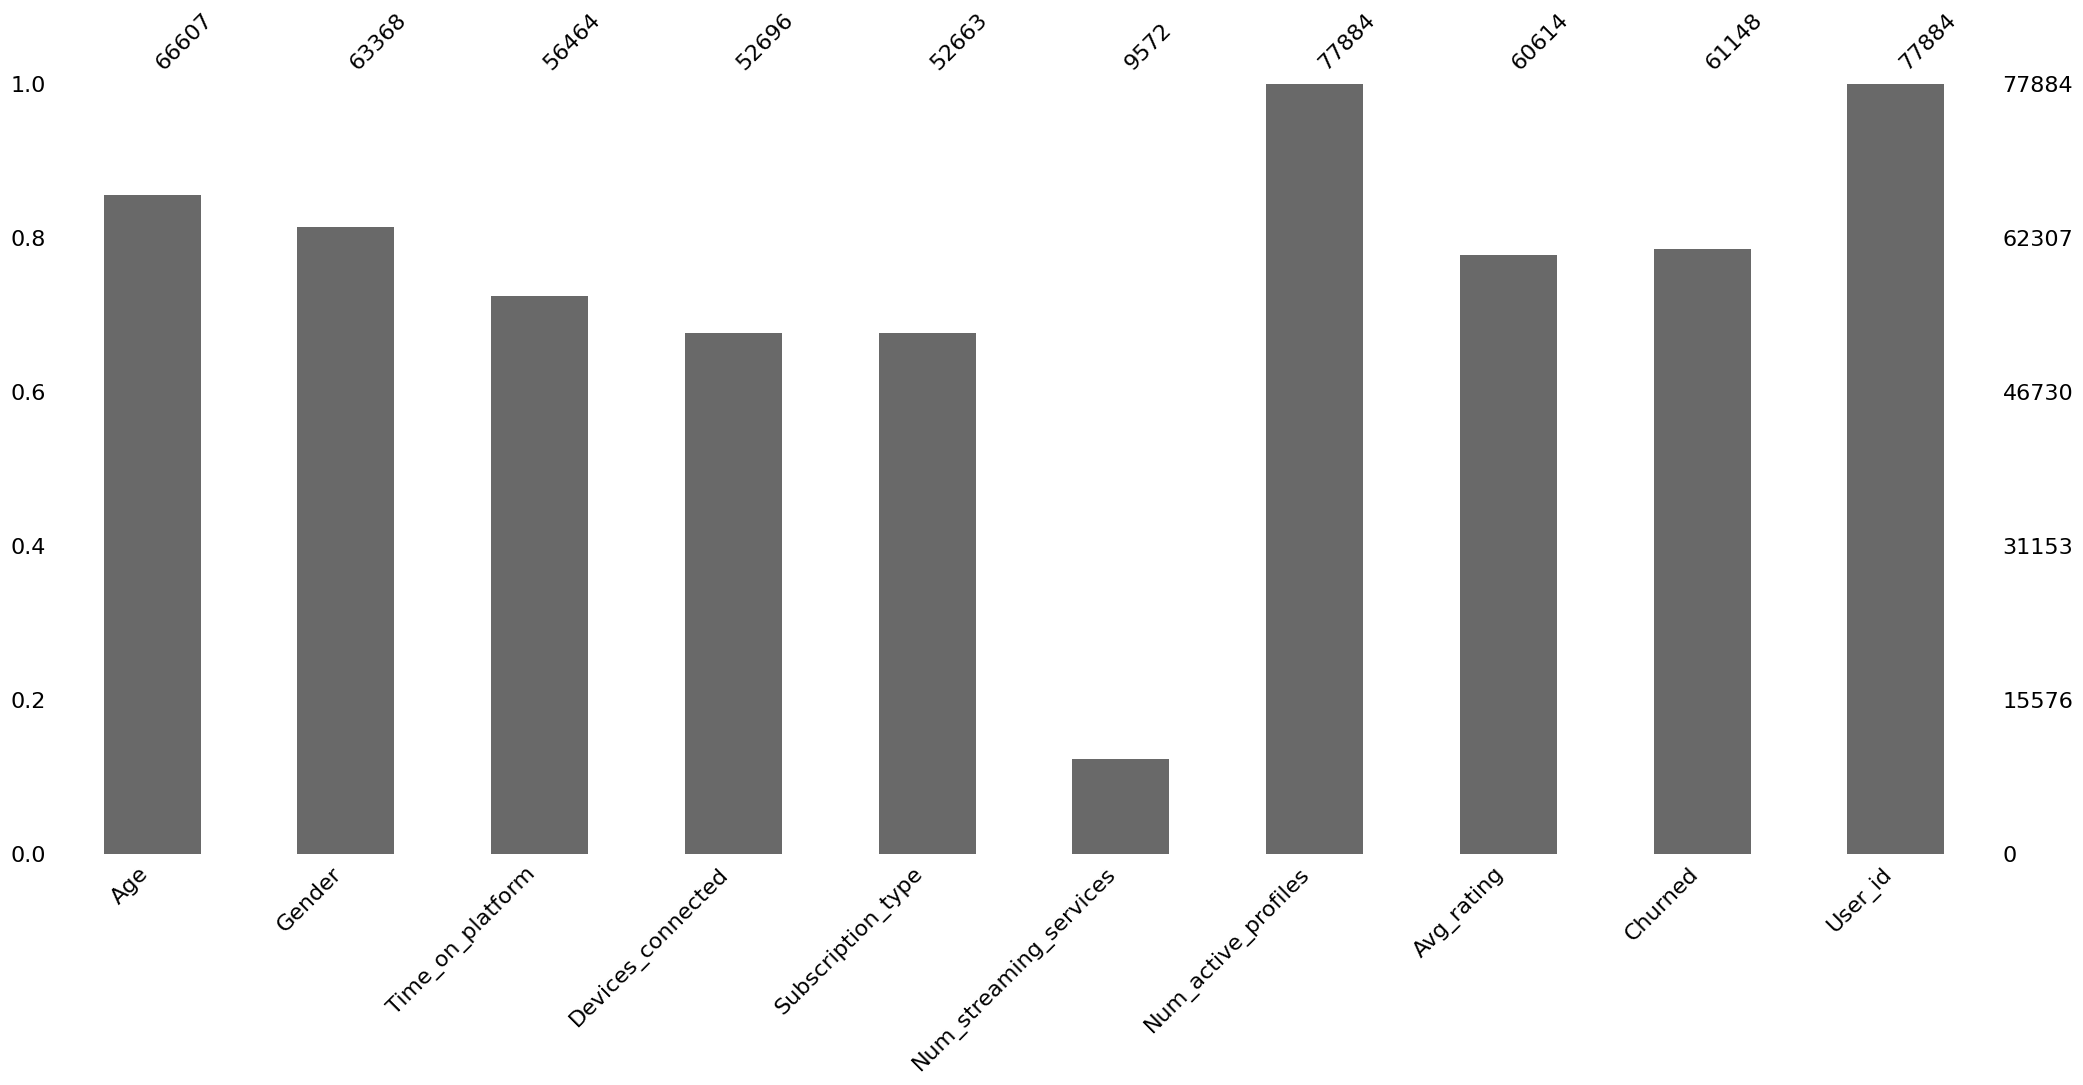

In [ ]:
msno.bar(streaming_data)

In [ ]:
streaming_data.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


## Etapa 02) Tratamento dos Dados (Data Preparation)

1. Substituir valores “NaN” por 0 Colunas → Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected
2. Dropar linhas nulas nas colunas Gender, Subscription_type e Age
3. Transformando valores churned 0 e 1 por No e Yes
4. Transformando valores floats em valores inteiros

In [ ]:

streaming_data[['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']] = streaming_data[['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']].fillna(0)

In [ ]:

print("Original values in rows 15:")
print(streaming_data.iloc[[14]])

streaming_data.loc[14, ['Time_on_platform', 'Num_streaming_services']] = [100, 5]


print("\nModified values in rows 15:")
streaming_data.iloc[[14]]

Original values in rows 15:
     Age Gender  Time_on_platform  Devices_connected Subscription_type  \
14  44.0   Male            4198.0                1.0             Basic   

    Num_streaming_services  Num_active_profiles  Avg_rating  Churned  \
14                     0.0                    3        2.59      0.0   

                                 User_id  
14  5417ca3a-b300-4429-b227-3bc75fbb2c1d  

Modified values in rows 15:


,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
14,44.0,Male,100.0,1.0,Basic,5.0,3,2.59,0.0,5417ca3a-b300-4429-b227-3bc75fbb2c1d


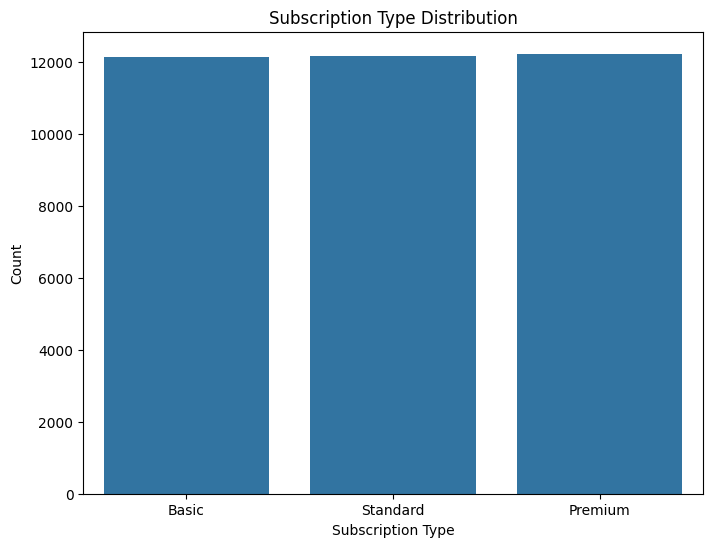

In [ ]:

streaming_data = streaming_data.dropna(subset=['Gender', 'Subscription_type', 'Age'])

plt.figure(figsize=(8, 6))
sns.countplot(x='Subscription_type', data=streaming_data)
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

In [ ]:
streaming_data['Churned'] = streaming_data['Churned'].replace({0: 'No', 1: 'Yes'})

print(streaming_data['Churned'])

0         No
1         No
2        Yes
3         No
5         No
        ... 
77879     No
77880     No
77881    Yes
77882     No
77883     No
Name: Churned, Length: 36515, dtype: object


<ipython-input-15-7f39a915d5ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streaming_data['Churned'] = streaming_data['Churned'].replace({0: 'No', 1: 'Yes'})


In [ ]:

float_columns = streaming_data.select_dtypes(include=['float64']).columns
streaming_data[float_columns] = streaming_data[float_columns].astype(int)

streaming_data

<ipython-input-16-3a713e771bfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streaming_data[float_columns] = streaming_data[float_columns].astype(int)


,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9
...,...,...,...,...,...,...,...,...,...,...
77879,45,Male,0,0,Basic,0,5,2,No,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47,Female,6176,0,Premium,0,2,4,No,59d70167-6be0-474c-b71e-14153205b44f
77881,64,Female,0,5,Premium,0,1,4,Yes,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58,Male,1314,5,Standard,0,4,0,No,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


## Etapa 03) Modelagem dos Dados - Regressão Logística

1. Definir variáveis X e y para o modelo
2. Realizar o .fit do modelo
3. Separar em train e test
4. Realizar a modelagem
5. Plotar matrix confusão
6. Printar métricas

In [ ]:

X = streaming_data.drop('Churned', axis=1)
y = streaming_data['Churned']

X = pd.get_dummies(X, columns=['Gender', 'Subscription_type'], drop_first=True)


print("Variáveis X:\n", X.head())
print("\nVariável y:\n", y.head())

Variáveis X:
    Age  Time_on_platform  Devices_connected  Num_streaming_services  \
0   49              4700                  3                       0   
1   69              6107                  2                       0   
2   44              6374                  3                       1   
3   26                 0                  5                       0   
5   54              3024                  2                       0   

   Num_active_profiles  Avg_rating                               User_id  \
0                    3           0  a271aa56-bcfc-4f0a-91f7-b773de6b86a4   
1                    1           2  fe14b048-770b-4619-8ec6-485b0969ae31   
2                    1           1  0283dffd-6684-4a05-9c6f-c02098a6849d   
3                    2           0  c316f2f5-3403-4a0a-82c2-c98e4b3379d2   
5                    1           0  a1df3a13-9255-4d00-8a9d-20565fefaab9   

   Gender_Male  Subscription_type_Premium  Subscription_type_Standard  
0         True                

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit = (X_train, y_train)


y_pred = (X_test)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = (y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 10955) + inhomogeneous part.

<Figure size 800x600 with 0 Axes>

In [ ]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

NameError: name 'y_pred' is not defined

## Etapa 04) Modelagem dos Dados - Tunning

1. Definir variáveis X e y para o modelo
2. Realizar o .fit do modelo
3. Separar em train e test
4. Realizar a modelagem
5. Plotar matrix confusão
6. Printar métricas

In [ ]:


X = streaming_data.drop('Churned', axis=1)
y = streaming_data['Churned']

X = pd.get_dummies(X, columns=['Gender', 'Subscription_type'], drop_first=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



X = streaming_data.drop('Churned', axis=1)
y = streaming_data['Churned']


if 'CustomerID' in X.columns:
    X = X.drop(columns=['CustomerID'])
else:
    print("CustomerID column not found in the DataFrame. Skipping drop operation.")


X = pd.get_dummies(X, columns=['Gender', 'Subscription_type'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

y_train = y_train.map({'Yes': 1, 'No': 0})



y_pred = model.predict(X_test)
model

CustomerID column not found in the DataFrame. Skipping drop operation.


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

NameError: name 'accuracy_score' is not defined

## Etapa 05) Modelagem dos Dados - Random Forest

1. Realizar a montagem do grid search
2. Realizar o .fit do modelo
3. Realizar o Tunning
4. Realizar a modelagem
5. Plotar matrix confusão
6. Printar métricas

In [ ]:


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

y_pred = best_rf_classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

ValueError: 
All the 405 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 929, in check_array
    array = array.astype(new_dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: '8d00af72-9f6f-487f-a6b9-88f61fca38e3'

--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 929, in check_array
    array = array.astype(new_dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: '686e3f86-f8dc-4aae-9387-96c680acea9e'


In [ ]:


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: could not convert string to float: '686e3f86-f8dc-4aae-9387-96c680acea9e'

In [ ]:


X = streaming_data.drop('Churned', axis=1)
y = streaming_data['Churned']

if 'CustomerID' in X.columns:
    X = X.drop(columns=['CustomerID'])
else:
    print("CustomerID column not found in the DataFrame. Skipping drop operation.")

X = pd.get_dummies(X, columns=['Gender', 'Subscription_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

model = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, zero_division=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


CustomerID column not found in the DataFrame. Skipping drop operation.


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1223, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 929, in check_array
    array = array.astype(new_dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: '8d00af72-9f6f-487f-a6b9-88f61fca38e3'

--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1223, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 929, in check_array
    array = array.astype(new_dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: '686e3f86-f8dc-4aae-9387-96c680acea9e'


In [ ]:
# prompt: Realizar a modelagem

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import sidetable as stb
import missingno as msno


X = streaming_data.drop('Churned', axis=1)
y = streaming_data['Churned']

X = pd.get_dummies(X, columns=['Gender', 'Subscription_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_


y_pred = best_rf_classifier.predict(X_test)




In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, zero_division=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

TypeError: '<' not supported between instances of 'int' and 'str'